# Breast Cancer Classification using deep learning model named BCNet-11 on histopathological images dataset

Breast Cancer is the most common type of cancer. Breast cancer is a form of cancer that originates in the breast cells. It occurs when cells in the breast tissue develop and divide uncontrollably, causing a lump or mass to form in the breast. Breast cancer is the most prevalent cancer in women and the second most prevalent cancer overall. Detection and diagnosis of a patient at an early stage increase the likelihood of long-term survival.

The dataset utlized for this study: https://ieeexplore.ieee.org/abstract/document/7312934?fbclid=IwAR1iKMWAGueF88W-sd5Tue3E4RvAx9l3WR768KrWtB82w3jbeNwbRJOweIM

The dataset consists of two classes: 1.benign 2. Malignant 

In [1]:
!nvidia-smi

Sun Apr 16 13:48:24 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 528.49       Driver Version: 528.49       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:26:00.0  On |                  N/A |
| 65%   57C    P3    24W / 170W |    509MiB / 12288MiB |      4%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Experimental Configuration

1. CPU: AMD Ryzen™ 5 5600X 6 Core Processor
2. RAM: 16 GB
3. GPU: Nvidia GeForce RTX 3060 (12GB dedicated GPU Memory)

# BCNet-11

We build a CNN model with 13 layers, including 6 convolutional layers and 5 pooling layers for feature extraction. The last two layers are considered output layers, with softmax activation functions used to identify the image.

In [1]:
### model
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras import Sequential
from keras import optimizers
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, CSVLogger
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow import keras
import numpy as np
from glob import glob
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger

class_num = 2


model = Sequential()

model.add(Conv2D(16,(2,2),activation='relu',input_shape=(512,512,3), dilation_rate=2))
model.add(MaxPool2D(2,2))

model.add(Conv2D(16,(2,2),activation='relu', dilation_rate=3))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32,(2,2),activation='relu', dilation_rate=4))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32,(2,2),activation='relu', dilation_rate=5))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(2,2),activation='relu', dilation_rate=6))
model.add(MaxPool2D(2,2))

model.add(Conv2D(128,(2,2),activation='relu', dilation_rate=7))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(class_num,activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 510, 510, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 255, 255, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 16)      1040      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 126, 126, 16)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 122, 122, 32)      2080      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 61, 61, 32)       0

# Details about Optimizer, Learning Rate and Loss function

To determine our model's prediction, we used the binary_crossentropy loss function. The efficient Adam optimizer is then utilized to minimize our Loss function. For our model, the best Learning rate is 0.001.

In [2]:
op = keras.optimizers.Adam(learning_rate=0.001)
model.compile(
  loss='binary_crossentropy',
  optimizer=op,
  metrics=['accuracy']
)

# Training Period : Batch Size = 32, Input image size = 512 for training, test and validation

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  brightness_range=(0.4, 0.7),
                                  vertical_flip= True,
                                  horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r'E:\Breast cancer dip\BC_Dataset\train',
                                                 target_size = (512,512),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

val_set = val_datagen.flow_from_directory(r'E:\Breast cancer dip\BC_Dataset\val',
                                          target_size = (512,512),
                                          batch_size = 32,
                                          class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory(r'E:\Breast cancer dip\BC_Dataset\test',
                                           target_size = (512,512),
                                           batch_size = 1,
                                           class_mode = 'categorical')



#model.optimizer.get_config()

Found 16418 images belonging to 2 classes.
Found 2053 images belonging to 2 classes.
Found 2053 images belonging to 2 classes.


# Model trained with 100 epochs

In [13]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

filepath = r"E:\Breast cancer dip\Weights\Dilation\Breastcustom.h5"



checkpoint1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1,save_weights_only=True,
                             save_best_only=True, mode='max')

log_csv = CSVLogger(r'E:\Breast cancer dip\Weights\Dilation\Breastcustom.csv', separator=',', append=False)

callbacks_list = [checkpoint1, log_csv]



r = model.fit_generator(
    training_set,
    epochs=100,
    validation_data=val_set,
    steps_per_epoch = len(training_set),
    validation_steps=len(val_set),
    callbacks=callbacks_list,
    shuffle=False
)

C:\Users\USER\AppData\Local\Temp\ipykernel_15160\1473669324.py:17: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/100
514/514 [==============================] - ETA: 0s - loss: 0.5245 - accuracy: 0.7617
Epoch 1: val_accuracy improved from -inf to 0.71310, saving model to D:\Osman\Breastcustom.h5
514/514 [==============================] - 279s 533ms/step - loss: 0.5245 - accuracy: 0.7617 - val_loss: 0.5596 - val_accuracy: 0.7131
Epoch 2/100
513/514 [============================>.] - ETA: 0s - loss: 0.4748 - accuracy: 0.8024
Epoch 2: val_accuracy improved from 0.71310 to 0.78227, saving model to D:\Osman\Breastcustom.h5
514/514 [==============================] - 229s 445ms/step - loss: 0.4749 - accuracy: 0.8024 - val_loss: 0.5105 - val_accuracy: 0.7823
Epoch 3/100
513/514 [============================>.] - ETA: 0s - loss: 0.4669 - accuracy: 0.8071
Epoch 3: val_accuracy improved from 0.78227 to 0.82952, saving model to D:\Osman\Breastcustom.h5
514/514 [==============================] - 230s 447ms/step - loss: 0.4669 - accuracy: 0.8071 - val_loss: 0.4307 - val_accuracy: 0.8295
Epoch 4/100
513/

# Training and Validation Accuracy Curve and Training and Validation Loss Curve

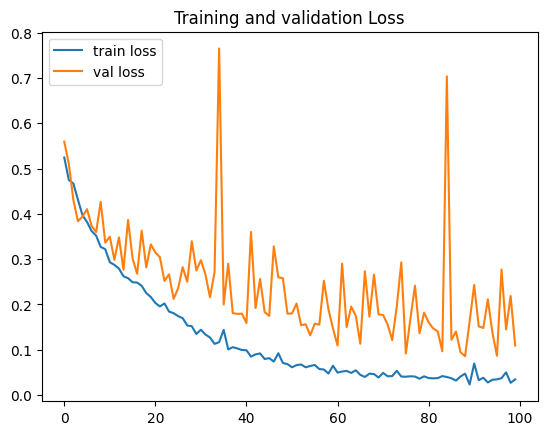

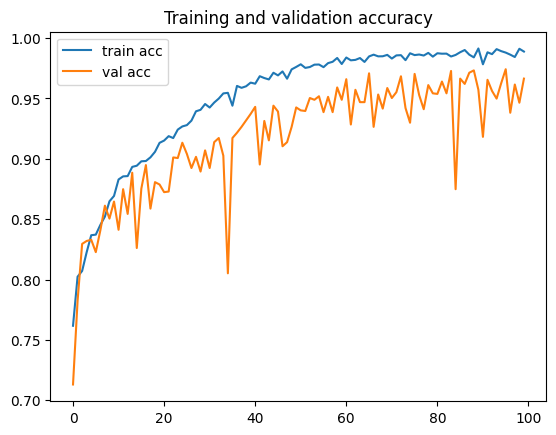

<Figure size 640x480 with 0 Axes>

In [14]:
#plot of accuracy and loss

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.title('Training and validation Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# Results of Test Accuracy and Loss

In [15]:
model.load_weights(filepath)
Adam = keras.optimizers.Adam(lr=0.001)


preds = model.evaluate_generator(test_set)
print ("Loss = ",float(preds[0]))
print ("Test Accuracy = ",float(preds[1])*100)

C:\Users\USER\anaconda3\envs\tensorflow\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
C:\Users\USER\AppData\Local\Temp\ipykernel_15160\3381981596.py:5: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  preds = model.evaluate_generator(test_set)


Loss =  0.11502353847026825
Test Accuracy =  97.56454229354858


# Confusion Matrix

In [5]:
### for f1 score and other values import files ### 

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
### matrics
from sklearn import metrics
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense

1/1 [==============================] - 0s 24ms/step


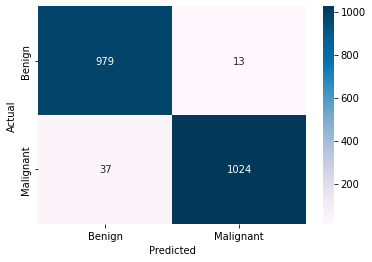

In [6]:
import pandas as pd
import seaborn as sn
import tensorflow as tf
model.load_weights(filepath)
filenames=test_set.filenames
nb_samples=len(test_set)
y_prob=[]
y_act=[]
test_set.reset()
for _ in range (nb_samples):
    X_test,Y_test = test_set.next()
    y_prob.append(model.predict(X_test))
    y_act.append(Y_test)
predicted_class=[list(training_set.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class=[list(training_set.class_indices.keys())[i.argmax()]for i in y_act]
out_df=pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix=pd.crosstab(out_df['actual_class'],out_df['predicted_class'],rownames=['Actual'],colnames=['Predicted'])
import matplotlib.pyplot as plt
sn.heatmap(confusion_matrix,cmap='PuBu', annot=True, fmt='d')
plt.show()

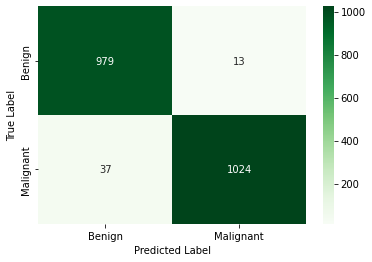

In [8]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Greens')
#plt.title('Confusion Matrix of The Proposed Architecture')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig(r'E:\Breast cancer dip\confmat_new4.png', dpi=500, bbox_inches='tight')
plt.show()